In [792]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [793]:
df=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [794]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [795]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [796]:
df.shape

(5110, 12)

In [797]:
import seaborn as sns

In [798]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='stroke', ylabel='count'>

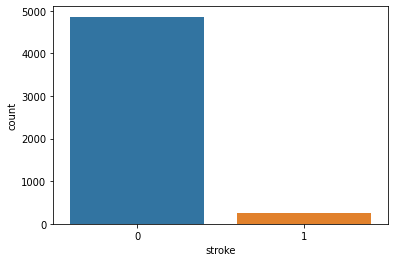

In [799]:
sns.countplot('stroke',data=df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

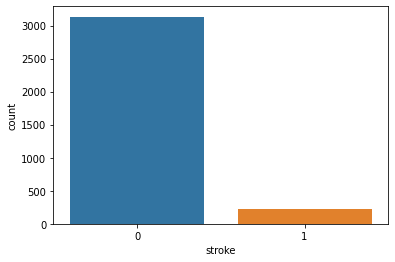

In [800]:
sns.countplot('stroke',data=df[df['ever_married']=='Yes'])


<AxesSubplot:xlabel='stroke', ylabel='count'>

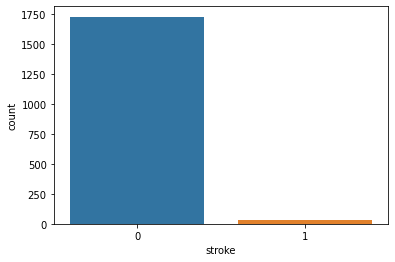

In [801]:
sns.countplot('stroke',data=df[df['ever_married']=='No'])

In [802]:
print('No. of strokes if patient is private employed =',df[df['ever_married']=='Yes']['stroke'].value_counts()[1]) 
print('No. of strokes if patient is not married =',df[df['ever_married']=='No']['stroke'].value_counts()[1]) 


No. of strokes if patient is private employed = 220
No. of strokes if patient is not married = 29


In [803]:
print('No. of strokes if patient is private employed =',df[df['work_type']=='Private']['stroke'].value_counts()[1]) 
print('No. of strokes if patient is self-employed =',df[df['work_type']=='Self-employed']['stroke'].value_counts()[1]) 
print('No. of strokes if patient is government employee =',df[df['work_type']=='Govt_job']['stroke'].value_counts()[1]) 
print('No. of strokes if patient is chilren =',df[df['work_type']=='children']['stroke'].value_counts()[1]) 
# print('No. of strokes if patient is Never_worked =',df[df['work_type']=='Never_worked']['stroke'].value_counts()[0]) 


No. of strokes if patient is private employed = 149
No. of strokes if patient is self-employed = 65
No. of strokes if patient is government employee = 33
No. of strokes if patient is chilren = 2


In [804]:
print('No. of strokes if patient is Urban residence =',df[df['Residence_type']=='Urban']['stroke'].value_counts()[1]) 
print('No. of strokes if patient is Rural residence =',df[df['Residence_type']=='Rural']['stroke'].value_counts()[1]) 


No. of strokes if patient is Urban residence = 135
No. of strokes if patient is Rural residence = 114


In [805]:
print('No. of strokes if patient had never smoked =',df[df['smoking_status']=='formerly smoked']['stroke'].value_counts()[1]) 
print('No. of strokes if patient had formely smoked =',df[df['smoking_status']=='never smoked']['stroke'].value_counts()[1]) 
print('No. of strokes if patient smokes =',df[df['smoking_status']=='smokes']['stroke'].value_counts()[1]) 


No. of strokes if patient had never smoked = 70
No. of strokes if patient had formely smoked = 90
No. of strokes if patient smokes = 42


In [806]:
print('No. of strokes if patient is male =',df[df['gender']=='Male']['stroke'].value_counts()[1]) 
print('No. of strokes if patient is female =',df[df['gender']=='Female']['stroke'].value_counts()[1]) 


No. of strokes if patient is male = 108
No. of strokes if patient is female = 141


In [807]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'No. of strokes male vs female')

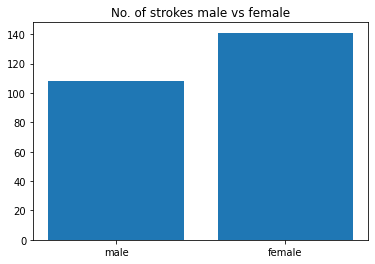

In [808]:
plt.bar(['male','female'], [df[df['gender']=='Male']['stroke'].value_counts()[1],df[df['gender']=='Female']['stroke'].value_counts()[1]])
plt.title('No. of strokes male vs female')

Text(0.5, 1.0, 'have hypertension vs not having hypertension')

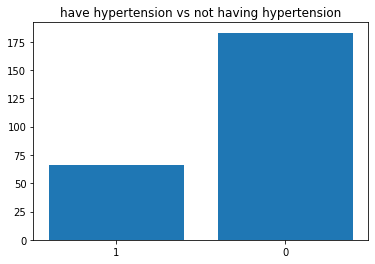

In [809]:
plt.bar(['1','0'], [df[df['hypertension']==1]['stroke'].value_counts()[1],df[df['hypertension']==0]['stroke'].value_counts()[1]])
plt.title('have hypertension vs not having hypertension')

Text(0.5, 1.0, 'have heart disease vs not having heart disease')

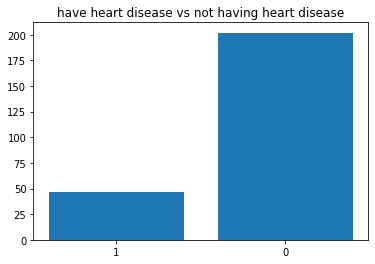

In [810]:
plt.bar(['1','0'], [df[df['heart_disease']==1]['stroke'].value_counts()[1],df[df['heart_disease']==0]['stroke'].value_counts()[1]])
plt.title('have heart disease vs not having heart disease')

In [811]:
print('No. of strokes if patient had never smoked =',df[df['hypertension']==1]['stroke'].value_counts()[1]) 
print('No. of strokes if patient had formely smoked =',df[df['hypertension']==0]['stroke'].value_counts()[1]) 


No. of strokes if patient had never smoked = 66
No. of strokes if patient had formely smoked = 183


Text(0.5, 1.0, 'age vs stroke')

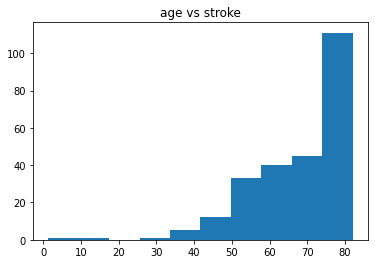

In [812]:
plt.hist(df[df['stroke']==1]['age'])
plt.title('age vs stroke')

In [813]:
df.work_type.unique()


array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [814]:
df.ever_married.unique()


array(['Yes', 'No'], dtype=object)

In [815]:
df.smoking_status.unique()


array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Text(0.5, 1.0, 'avg_glucose_level vs stroke')

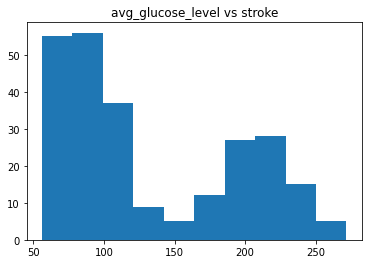

In [816]:
plt.hist(df[df['stroke']==1]['avg_glucose_level'])
plt.title('avg_glucose_level vs stroke')

In [817]:
df['bmi']=df['bmi'].replace(np.NaN,df['bmi'].mean())

In [818]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Text(0.5, 1.0, 'bmi vs stroke')

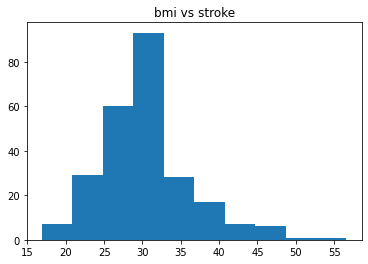

In [819]:
plt.hist(df[df['stroke']==1]['bmi'])
plt.title('bmi vs stroke')

In [820]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1})
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1})
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2})
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':-1})

In [821]:
df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0}).astype(np.uint8)


In [822]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,51676,1,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.000000,0,1


In [823]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [824]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,1,80.0,1,0,1,0,1,83.75,28.893237,0,0
5106,44873,1,81.0,0,0,1,1,1,125.20,40.000000,0,0
5107,19723,1,35.0,0,0,1,1,0,82.99,30.600000,0,0
5108,37544,0,51.0,0,0,1,0,0,166.29,25.600000,1,0
5109,44679,1,44.0,0,0,1,2,1,85.28,26.200000,-1,0


In [905]:
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.preprocessing import MinMaxScaler

std_scaler = MinMaxScaler()

df= pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)


In [826]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.666667,1.0
1,0.708205,1.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.333333,1.0
2,0.426015,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.333333,1.0
3,0.824928,1.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000,1.0
4,0.021929,1.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.333333,1.0


In [827]:
df2=df.drop(['stroke'],axis=1)
df2=df2.drop(['id'],axis=1)

In [828]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.666667
1,1.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.333333
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.333333
3,1.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
4,1.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.333333


In [829]:
X=df2

In [830]:
y=df['stroke']

In [831]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [832]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3897,0.5,0.047852,0.0,0.0,0.0,0.25,0.0,0.162958,0.067583,0.000000
576,0.5,0.353027,0.0,0.0,0.0,0.50,1.0,0.703813,0.143184,1.000000
4013,0.5,0.536133,1.0,0.0,1.0,0.50,0.0,0.166928,0.185567,0.333333
4536,1.0,0.829102,1.0,0.0,1.0,0.50,1.0,0.441418,0.343643,0.000000
1180,1.0,0.755859,0.0,0.0,1.0,0.50,0.0,0.126720,0.294387,0.666667
...,...,...,...,...,...,...,...,...,...,...
4426,0.5,0.523926,0.0,0.0,1.0,1.00,0.0,0.151787,0.232532,0.333333
466,1.0,0.743652,1.0,0.0,1.0,0.50,0.0,0.530560,0.571592,1.000000
3092,1.0,0.013184,0.0,0.0,0.0,0.25,1.0,0.194627,0.085911,0.000000
3772,0.5,0.975586,0.0,0.0,1.0,0.75,0.0,0.650725,0.237113,0.666667


In [833]:
y_train

3897    0.0
576     0.0
4013    0.0
4536    0.0
1180    0.0
       ... 
4426    0.0
466     0.0
3092    0.0
3772    0.0
860     0.0
Name: stroke, Length: 3577, dtype: float64

In [834]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [835]:
oversample = SMOTE()
X_train, y_train= oversample.fit_resample(X_train, y_train.ravel())

In [836]:
y_train.shape

(6834,)

In [837]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}


In [838]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 80.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 90.0 % accuracy score
Classifiers:  SVC Has a training score of 84.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 96.0 % accuracy score


In [839]:
from sklearn.model_selection import GridSearchCV


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_
random_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_random_forest=GridSearchCV(RandomForestClassifier(), tree_params)
grid_random_forest.fit(X_train, y_train)
random_forest_clf = grid_random_forest.best_estimator_


In [840]:
knears_neighbors

KNeighborsClassifier(n_neighbors=2)

In [841]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

random_forest_score = cross_val_score(random_forest_clf, X_train, y_train, cv=5)
print('random_forest Classifier Cross Validation Score', round(random_forest_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  80.26%
Knears Neighbors Cross Validation Score 93.88%
Support Vector Classifier Cross Validation Score 83.52%
DecisionTree Classifier Cross Validation Score 80.66%
random_forest Classifier Cross Validation Score 80.58%


In [844]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
random_forest_pred=cross_val_predict(random_forest_clf, X_train, y_train, cv=5)

In [845]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train, random_forest_pred))

Logistic Regression:  0.8567087268472662
KNears Neighbors:  0.938835235586772
Support Vector Classifier:  0.9024467430274474
Decision Tree Classifier:  0.8065554580040972
Random Forest Classifier:  0.8061164764413228


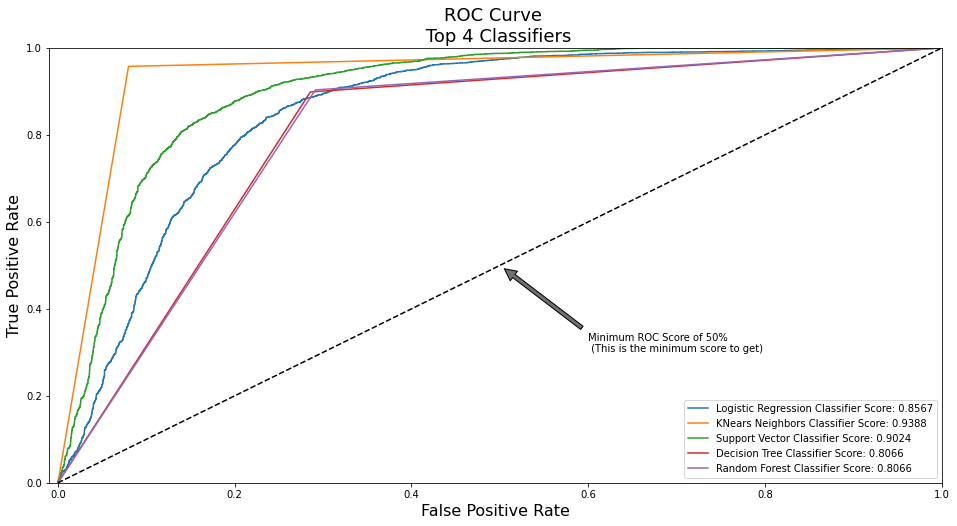

In [846]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
random_forest_fpr, random_forest_tpr, random_forest_threshold = roc_curve(y_train, random_forest_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,random_forest_fpr,random_forest_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(random_forest_fpr, random_forest_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,random_forest_fpr,random_forest_tpr)
plt.show()

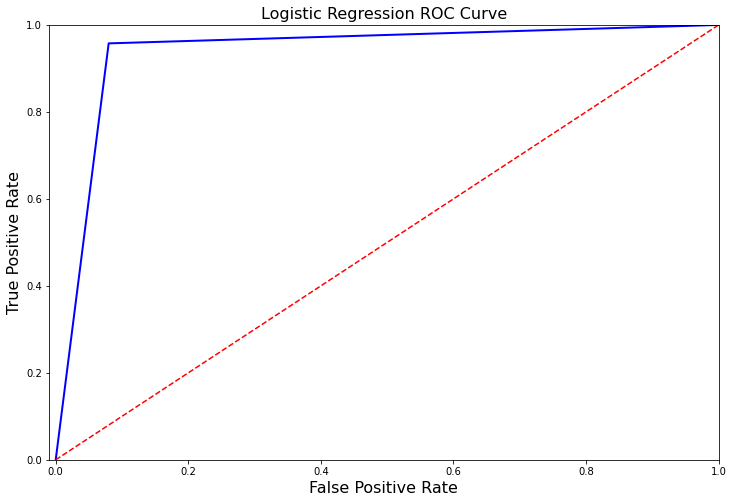

In [847]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(knear_fpr, knear_tpr)
plt.show()

In [848]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, knears_pred)


In [849]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = knears_neighbors.predict(X_train)

print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))


Recall Score: 0.99
Precision Score: 1.00
F1 Score: 0.99
Accuracy Score: 0.99


In [850]:
test_pred=knears_neighbors.predict(X_test)

In [851]:
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      1444
         1.0       0.13      0.16      0.14        89

    accuracy                           0.89      1533
   macro avg       0.54      0.55      0.54      1533
weighted avg       0.90      0.89      0.90      1533



In [852]:
X_test.shape

(1533, 10)

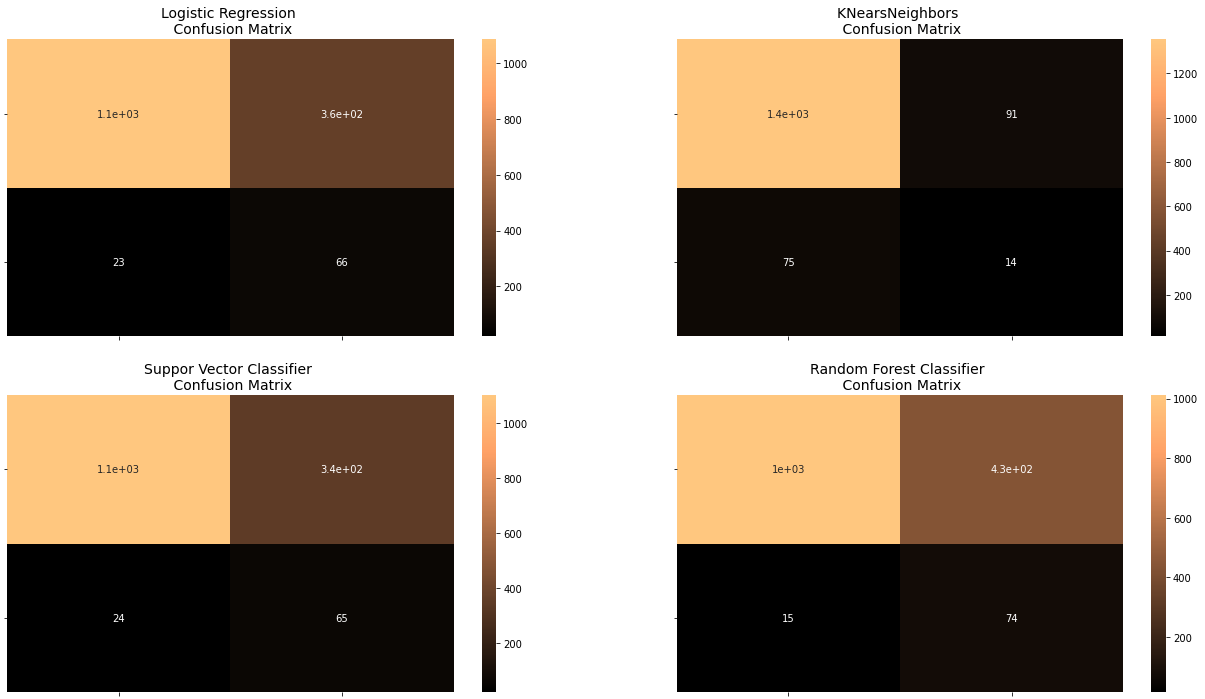

In [853]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_random_forest = random_forest_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
random_forest_cf = confusion_matrix(y_test, y_pred_random_forest)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(random_forest_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [854]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_random_forest))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85      1444
         1.0       0.15      0.74      0.26        89

    accuracy                           0.75      1533
   macro avg       0.57      0.75      0.55      1533
weighted avg       0.93      0.75      0.81      1533

KNears Neighbors:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      1444
         1.0       0.13      0.16      0.14        89

    accuracy                           0.89      1533
   macro avg       0.54      0.55      0.54      1533
weighted avg       0.90      0.89      0.90      1533

Support Vector Classifier:
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86      1444
         1.0       0.16      0.73      0.26        89

    accuracy                           0.76      1533
   macro avg       0.57      0.75      0.56      1533
weighted

In [855]:
X_test.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,0.5,0.377441,0.0,0.0,0.0,0.75,0.0,0.044917,0.145475,0.000000
4478,0.5,0.487305,0.0,0.0,1.0,0.75,0.0,0.046949,0.206186,0.333333
3849,1.0,0.096680,0.0,0.0,0.0,0.25,1.0,0.089096,0.139748,0.000000
4355,1.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.099344,0.105384,0.333333
3826,1.0,0.914551,0.0,0.0,1.0,1.00,0.0,0.183039,0.193585,0.333333
3951,1.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.172237,0.212981,0.333333
3396,1.0,0.682617,1.0,0.0,1.0,0.50,0.0,0.195042,0.272623,1.000000
465,0.5,0.841309,0.0,0.0,1.0,0.50,0.0,0.214200,0.189003,1.000000
410,0.5,0.084473,0.0,0.0,0.0,0.75,0.0,0.041270,0.098511,0.000000
1632,1.0,0.017090,0.0,0.0,0.0,0.25,0.0,0.001800,0.093929,0.000000


In [856]:
X_test.values[0]

array([0.5       , 0.37744141, 0.        , 0.        , 0.        ,
       0.75      , 0.        , 0.04491737, 0.14547537, 0.        ])

In [857]:
test=X_test.values[0]
test[:][0]

0.5

In [858]:
final=random_forest_clf.predict(X_test[90:100])

In [859]:
final

array([0., 1., 1., 0., 0., 0., 1., 1., 0., 1.])

In [860]:
y_test[90:100]

3822    0.0
1295    0.0
1971    0.0
4710    0.0
2344    0.0
1038    0.0
65      1.0
3783    0.0
842     0.0
2422    0.0
Name: stroke, dtype: float64

In [861]:
test1=[0,67.0,0,1,1,0,1,228.69,36.600000,1]

In [862]:
test1=std_scaler.fit_transform([test1])

In [863]:
test1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [864]:
pipe=Pipeline([('std_scaler',StandardScaler()),
              ( "KNearest", KNeighborsClassifier(n_neighbors=2,algorithm='auto'))
              ])

In [865]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('KNearest', KNeighborsClassifier(n_neighbors=2))])

In [867]:
pipe.score(X_train,y_train)

0.9950248756218906

In [868]:
pipe.score(X_test,y_test)

0.8858447488584474

In [869]:
pred=pipe.predict(X_test)

In [870]:
y_test[90:100]

3822    0.0
1295    0.0
1971    0.0
4710    0.0
2344    0.0
1038    0.0
65      1.0
3783    0.0
842     0.0
2422    0.0
Name: stroke, dtype: float64

In [871]:
pred[90:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [872]:
cross_val_score(pipe,X_train,y_train,cv=10,scoring='f1')

array([0.94084507, 0.94555874, 0.95827338, 0.93428571, 0.94388489,
       0.94751773, 0.94857143, 0.9323741 , 0.95292439, 0.95196507])

In [873]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1444
         1.0       0.11      0.13      0.12        89

    accuracy                           0.89      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.90      0.89      0.89      1533



In [885]:
test1=[0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.666667]
pred1=pipe.predict([test1])

In [886]:
pred1

array([1.])